In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
import keras
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import autokeras as ak


In [77]:
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10245491865709599350
xla_global_id: -1
]


In [78]:
np.random.seed(42)

In [79]:
image_dir        = "D:\\Dataset\\HAM10000_Images_All"
metadata_csv     = "D:\\Dataset\\HAM10000_MetaData_CSV\\HAM10000_metadata.csv"
path_splitter    = "\\"
images_type      = ".jpg"

re_organized_dir = "D:\\Dataset\\re_organized"

In [80]:
skin_df = pd.read_csv(metadata_csv)

In [81]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [82]:
skin_df.count()

lesion_id       10015
image_id        10015
dx              10015
dx_type         10015
age              9958
sex             10015
localization    10015
dataset         10015
dtype: int64

In [83]:
skin_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [84]:
SIZE = 32

In [85]:
le = LabelEncoder()
le.fit(skin_df['dx'])
skin_df['label'] = le.transform(skin_df['dx'])

In [86]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2


<AxesSubplot:>

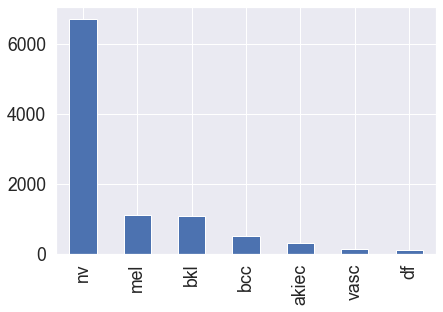

In [87]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)

In [88]:
skin_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [89]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [90]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 2320 to 2461
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     142 non-null    object 
 1   image_id      142 non-null    object 
 2   dx            142 non-null    object 
 3   dx_type       142 non-null    object 
 4   age           142 non-null    float64
 5   sex           142 non-null    object 
 6   localization  142 non-null    object 
 7   dataset       142 non-null    object 
 8   label         142 non-null    int32  
dtypes: float64(1), int32(1), object(7)
memory usage: 10.5+ KB


In [91]:
num_samples = 500

In [92]:
from sklearn.utils import resample

In [93]:
df_0_500 = resample(df_0, replace=True, n_samples=num_samples, random_state=42)
df_1_500 = resample(df_1, replace=True, n_samples=num_samples, random_state=42)
df_2_500 = resample(df_2, replace=True, n_samples=num_samples, random_state=42)
df_3_500 = resample(df_3, replace=True, n_samples=num_samples, random_state=42)
df_4_500 = resample(df_4, replace=True, n_samples=num_samples, random_state=42)
df_5_500 = resample(df_5, replace=True, n_samples=num_samples, random_state=42)
df_6_500 = resample(df_6, replace=True, n_samples=num_samples, random_state=42)

In [94]:
df_0_500.count()

lesion_id       500
image_id        500
dx              500
dx_type         500
age             500
sex             500
localization    500
dataset         500
label           500
dtype: int64

In [95]:
skin_df_500 = pd.concat([df_0_500, 
                       df_1_500,
                       df_2_500,
                       df_3_500,
                       df_4_500,
                       df_5_500,
                       df_6_500])

In [96]:
skin_df_500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 9789 to 2363
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     3500 non-null   object 
 1   image_id      3500 non-null   object 
 2   dx            3500 non-null   object 
 3   dx_type       3500 non-null   object 
 4   age           3488 non-null   float64
 5   sex           3500 non-null   object 
 6   localization  3500 non-null   object 
 7   dataset       3500 non-null   object 
 8   label         3500 non-null   int32  
dtypes: float64(1), int32(1), object(7)
memory usage: 259.8+ KB


In [97]:
skin_df_500.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,rosendahl,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,rosendahl,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,rosendahl,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,rosendahl,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,rosendahl,0


In [98]:

skin_df_500['path'] = image_dir + path_splitter + skin_df["image_id"] + images_type

In [99]:
skin_df_500['image'] = skin_df_500['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE, SIZE))))

In [100]:
X = np.asarray(skin_df_500['image'].tolist())

In [101]:
X = X/255

In [102]:
Y = skin_df_500['label']

In [103]:
Y_cat = to_categorical(Y, num_classes=7)

In [104]:
Y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [106]:
num_classes = 7

In [107]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 128)        

In [108]:
batch_size = 16 
epochs = 40

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)


Epoch 1/40
165/165 - 7s - loss: 1.8795 - acc: 0.2141 - val_loss: 1.9475 - val_acc: 0.2457 - 7s/epoch - 44ms/step
Epoch 2/40
165/165 - 7s - loss: 1.6579 - acc: 0.3147 - val_loss: 1.5505 - val_acc: 0.3543 - 7s/epoch - 42ms/step
Epoch 3/40
165/165 - 7s - loss: 1.5039 - acc: 0.3886 - val_loss: 1.4478 - val_acc: 0.4171 - 7s/epoch - 41ms/step
Epoch 4/40
165/165 - 7s - loss: 1.4337 - acc: 0.4309 - val_loss: 1.5567 - val_acc: 0.3737 - 7s/epoch - 41ms/step
Epoch 5/40
165/165 - 7s - loss: 1.3808 - acc: 0.4469 - val_loss: 1.3844 - val_acc: 0.4720 - 7s/epoch - 41ms/step
Epoch 6/40
165/165 - 7s - loss: 1.3303 - acc: 0.4792 - val_loss: 1.3430 - val_acc: 0.4491 - 7s/epoch - 41ms/step
Epoch 7/40
165/165 - 7s - loss: 1.3023 - acc: 0.4846 - val_loss: 1.2564 - val_acc: 0.5097 - 7s/epoch - 41ms/step
Epoch 8/40
165/165 - 7s - loss: 1.2585 - acc: 0.5131 - val_loss: 1.2530 - val_acc: 0.4754 - 7s/epoch - 41ms/step
Epoch 9/40
165/165 - 7s - loss: 1.2567 - acc: 0.5074 - val_loss: 1.2974 - val_acc: 0.4960 - 7s/e

In [116]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


28/28 [==============================] - 0s 17ms/step - loss: 0.8316 - acc: 0.7234
Test accuracy: 0.7234285473823547


In [117]:
history

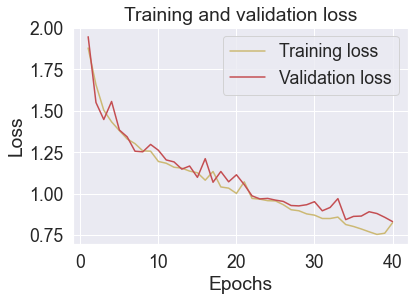

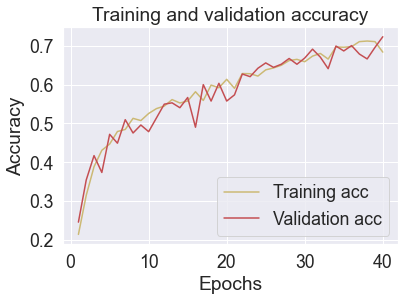

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [119]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_test, axis = 1) 

28/28 [==============================] - 0s 16ms/step


In [120]:
cm = confusion_matrix(y_true, y_pred_classes)

<AxesSubplot:>

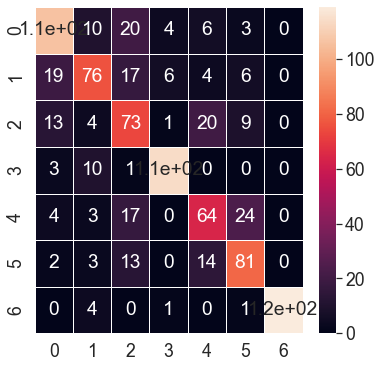

In [121]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

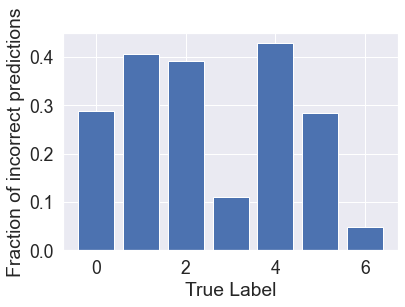

In [122]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')